In [1]:
import math
import numpy as np
import time, random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from pydrake.math import sin, cos
from pydrake.all import *
from underactuated import (FindResource, PlanarRigidBodyVisualizer)


In [19]:
%reload_ext autoreload
%autoreload 2
from dynamics_nd import \
get_nd_state, get_nd_dynamics, get_corner_distances, \
get_corner_x_positions, compute_optimal_control, MeshcatCubeVisualizer

In [3]:
vis = MeshcatCubeVisualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7002/static/


In [4]:
dimension = 3

In [5]:
# Set the inital condititions
x = 0.; y = 0.0; theta = 0.;
origin1 = get_nd_state((x,y,theta,0,0,0,0,0), dimension)

x = -0.5; y = .5*(2**.5)-.5; theta = np.pi/4.0;
final1 = get_nd_state((x,y,theta,0,0,0,0,0), dimension)

minimum_time = 0.5; maximum_time = 15.; max_torque = 1000.0


In [83]:
vis.draw_transformation(origin1, dimension)

In [84]:
vis.draw_transformation(final1, dimension)

In [22]:
traj, input_traj, force_traj, time_array = \
compute_optimal_control(origin1, final1, \
                        minimum_time, maximum_time, \
                        max_torque, dimension)


Initial State: [0.0, 0.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Final State: [-0.5, 0.20710678118654757, 0, 0.7853981633974483, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of decision vars 1165
SolutionResult.kSolutionFound


In [109]:
# trajectory found
dt = time_array[1] - time_array[0]
for i in range(len(traj)):
    vis.draw_transformation(traj[i,:],dimension)
    time.sleep(dt)

In [101]:
%reload_ext autoreload
%autoreload 2
from plotting import *

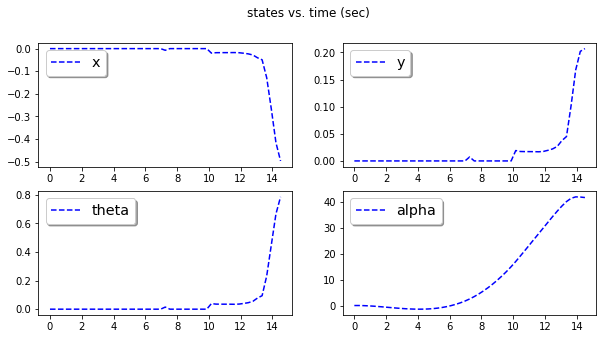

In [106]:
plot_states(traj, time_array, dimension)

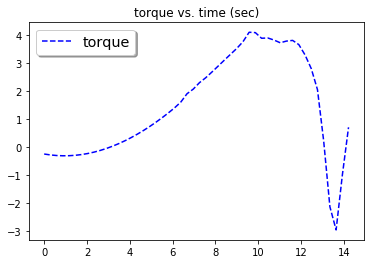

In [105]:
input_plot(input_traj, time_array, dimension)

In [92]:
input_traj[20:]

array([ 1.21183299,  1.39245767,  1.59808726,  1.89517883,  2.05971231,
        2.28984778,  2.46374876,  2.66811966,  2.879764  ,  3.09188971,
        3.30225023,  3.51109427,  3.7501119 ,  4.08975134,  4.07614819,
        3.87499029,  3.88527629,  3.81153869,  3.71445137,  3.77389631,
        3.79822642,  3.6478939 ,  3.27953214,  2.791373  ,  2.04087152,
        0.20544238, -2.13899502, -2.96561124, -1.01723335,  0.69654194])

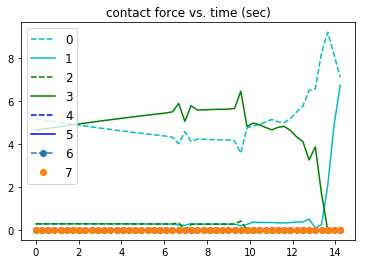

In [104]:
ground_force_plot(force_traj, time_array, dimension)

In [81]:
dim = 3
angle = 0.0
angle_vel = 0.0 # 5.0
current_state = (0,0,angle,0.0,0.,0.,angle_vel,20.0)
current_state = get_nd_state(current_state, dim)
# print(current_state)
vis.draw_transformation(current_state, dim)

In [82]:
# code to simulate dynamics
sec = 0.5 # seconds
steps_per_sec = 1000.0 # discrete steps in a second
num_steps = sec*steps_per_sec # total number of steps
sec_per_step = sec/num_steps # number of seconds per step
for t in np.linspace(0,sec,num_steps):
    torque = [1.0]
    force = [0.,0.,0.,0.,0.,0.,0.,0.]
    current_state += get_nd_dynamics(current_state,torque,force,dim)*sec_per_step
    vis.draw_transformation(current_state, dim)
    time.sleep(sec_per_step)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  
